In [2]:
import nltk, re, pprint
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

In [3]:
# reading treebank tagged sentences
wsj = list(nltk.corpus.treebank.tagged_sents())

In [4]:
print(wsj[:20])

[[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')], [('Rudolph', 'NNP'), ('Agnew', 'NNP'), (',', ','), ('55', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('and', 'CC'), ('former', 'JJ'), ('chairman', 'NN'), ('of', 'IN'), ('Consolidated', 'NNP'), ('Gold', 'NNP'), ('Fields', 'NNP'), ('PLC', 'NNP'), (',', ','), ('was', 'VBD'), ('named', 'VBN'), ('*-1', '-NONE-'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('of', 'IN'), ('this', 'DT'), ('British', 'JJ'), ('industrial', 'JJ'), ('conglomerate', 'NN'), ('.', '.')], [('A', 'DT'), ('f

In [5]:
random.seed(1234)
train_set, test_set = train_test_split(wsj, test_size = 0.3)

print(len(train_set))
print(len(test_set))
print(train_set[:40])

2739
1175
[[('In', 'IN'), ('the', 'DT'), ('interview', 'NN'), ('at', 'IN'), ('headquarters', 'NN'), ('yesterday', 'NN'), ('afternoon', 'NN'), (',', ','), ('both', 'DT'), ('men', 'NNS'), ('exuded', 'VBD'), ('confidence', 'NN'), ('and', 'CC'), ('seemed', 'VBD'), ('*-1', '-NONE-'), ('to', 'TO'), ('work', 'VB'), ('well', 'RB'), ('together', 'RB'), ('.', '.')], [('``', '``'), ('It', 'PRP'), ("'s", 'VBZ'), ('a', 'DT'), ('cosmetic', 'JJ'), ('move', 'NN'), (',', ','), ("''", "''"), ('said', 'VBD'), ('*T*-1', '-NONE-'), ('Jonathan', 'NNP'), ('S.', 'NNP'), ('Gelles', 'NNP'), ('of', 'IN'), ('Wertheim', 'NNP'), ('Schroder', 'NNP'), ('&', 'CC'), ('Co', 'NNP'), ('.', '.')], [('Georgia', 'NNP'), ('Gulf', 'NNP'), ('rebuffed', 'VBD'), ('that', 'DT'), ('offer', 'NN'), ('in', 'IN'), ('September', 'NNP'), ('and', 'CC'), ('said', 'VBD'), ('0', '-NONE-'), ('it', 'PRP'), ('would', 'MD'), ('study', 'VB'), ('other', 'JJ'), ('alternatives', 'NNS'), ('.', '.')], [('And', 'CC'), ('because', 'IN'), ('of', 'IN'), (

In [6]:
train_tagged_words = [tup for sent in train_set for tup in sent]
len(train_tagged_words)

70158

In [7]:
tokens = [pair[0] for pair in train_tagged_words]
tokens[:10]

['In',
 'the',
 'interview',
 'at',
 'headquarters',
 'yesterday',
 'afternoon',
 ',',
 'both',
 'men']

In [8]:
v = set(tokens)
print(len(v))

10173


In [9]:
t = set([pair[1] for pair in train_tagged_words])
len(t)
print(t)

{',', '.', 'JJS', 'NNPS', 'PRP$', 'WDT', '#', 'VBG', 'IN', 'NNS', 'TO', 'JJ', 'LS', 'DT', ':', 'JJR', 'NNP', 'RBR', 'VBZ', 'WRB', 'VBP', 'MD', 'RP', "''", 'RBS', 'RB', '-RRB-', '``', 'CD', 'WP', 'NN', 'VBD', 'WP$', 'PRP', 'PDT', 'UH', '$', '-NONE-', 'FW', 'EX', '-LRB-', 'VBN', 'CC', 'POS', 'VB'}


In [10]:
T = len(t)
V = len(v)
w_given_t = np.zeros((T,V))

In [11]:
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1] == tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0] == word]
    count_w_given_tag = len(w_given_tag_list)
    return(count_w_given_tag,count_tag)

In [12]:
print("\n","large")
print(word_given_tag("large", "JJ"))
print(word_given_tag("large", "VB"))
print(word_given_tag("large", "NN"),"\n")

print("\n","will")
print(word_given_tag("will", "MD"))
print(word_given_tag("will", "NN"))
print(word_given_tag("will", "VB"))

print("\n","book")
print(word_given_tag("book", "NN"))
print(word_given_tag("book", "VB"))


 large
(20, 4075)
(0, 1831)
(0, 9169) 


 will
(206, 659)
(1, 9169)
(0, 1831)

 book
(5, 9169)
(1, 1831)


In [13]:
def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tag = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tag if t==t1])
    count_t2_t1 = 0
    for index in range(len(tag)-1):
        count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [14]:
tags_matrix = np.zeros((len(t), len(t)), dtype = 'float32')
for i, t1 in enumerate(list(t)):
    for j, t2 in enumerate(list(t)):
        tags_matrix[i,j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

In [15]:
tags_matrix

array([[ 21.150738,  21.150738,  21.150738, ...,  21.150738,  21.150738,
         21.150738],
       [ 25.907312,  25.907312,  25.907312, ...,  25.907312,  25.907312,
         25.907312],
       [584.64166 , 584.64166 , 584.64166 , ..., 584.64166 , 584.64166 ,
        584.64166 ],
       ...,
       [ 44.54413 ,  44.54413 ,  44.54413 , ...,  44.54413 ,  44.54413 ,
         44.54413 ],
       [125.95512 , 125.95512 , 125.95512 , ..., 125.95512 , 125.95512 ,
        125.95512 ],
       [ 38.31622 ,  38.31622 ,  38.31622 , ...,  38.31622 ,  38.31622 ,
         38.31622 ]], dtype=float32)

In [16]:
tags_df = pd.DataFrame(tags_matrix, columns = list(t),index = list(t))

In [17]:
tags_df

,",",.,JJS,NNPS,PRP$,WDT,#,VBG,IN,NNS,...,UH,$,-NONE-,FW,EX,-LRB-,VBN,CC,POS,VB
",",21.150738,21.150738,21.150738,21.150738,21.150738,21.150738,21.150738,21.150738,21.150738,21.150738,...,21.150738,21.150738,21.150738,21.150738,21.150738,21.150738,21.150738,21.150738,21.150738,21.150738
.,25.907312,25.907312,25.907312,25.907312,25.907312,25.907312,25.907312,25.907312,25.907312,25.907312,...,25.907312,25.907312,25.907312,25.907312,25.907312,25.907312,25.907312,25.907312,25.907312,25.907312
JJS,584.641663,584.641663,584.641663,584.641663,584.641663,584.641663,584.641663,584.641663,584.641663,584.641663,...,584.641663,584.641663,584.641663,584.641663,584.641663,584.641663,584.641663,584.641663,584.641663,584.641663
NNPS,430.411041,430.411041,430.411041,430.411041,430.411041,430.411041,430.411041,430.411041,430.411041,430.411041,...,430.411041,430.411041,430.411041,430.411041,430.411041,430.411041,430.411041,430.411041,430.411041,430.411041
PRP$,131.134583,131.134583,131.134583,131.134583,131.134583,131.134583,131.134583,131.134583,131.134583,131.134583,...,131.134583,131.134583,131.134583,131.134583,131.134583,131.134583,131.134583,131.134583,131.134583,131.134583
WDT,222.720642,222.720642,222.720642,222.720642,222.720642,222.720642,222.720642,222.720642,222.720642,222.720642,...,222.720642,222.720642,222.720642,222.720642,222.720642,222.720642,222.720642,222.720642,222.720642,222.720642
#,6377.909180,6377.909180,6377.909180,6377.909180,6377.909180,6377.909180,6377.909180,6377.909180,6377.909180,6377.909180,...,6377.909180,6377.909180,6377.909180,6377.909180,6377.909180,6377.909180,6377.909180,6377.909180,6377.909180,6377.909180
VBG,67.523582,67.523582,67.523582,67.523582,67.523582,67.523582,67.523582,67.523582,67.523582,67.523582,...,67.523582,67.523582,67.523582,67.523582,67.523582,67.523582,67.523582,67.523582,67.523582,67.523582
IN,10.179483,10.179483,10.179483,10.179483,10.179483,10.179483,10.179483,10.179483,10.179483,10.179483,...,10.179483,10.179483,10.179483,10.179483,10.179483,10.179483,10.179483,10.179483,10.179483,10.179483
NNS,16.468779,16.468779,16.468779,16.468779,16.468779,16.468779,16.468779,16.468779,16.468779,16.468779,...,16.468779,16.468779,16.468779,16.468779,16.468779,16.468779,16.468779,16.468779,16.468779,16.468779


In [18]:
tags_df.loc['.',:]

,         25.907312
.         25.907312
JJS       25.907312
NNPS      25.907312
PRP$      25.907312
WDT       25.907312
#         25.907312
VBG       25.907312
IN        25.907312
NNS       25.907312
TO        25.907312
JJ        25.907312
LS        25.907312
DT        25.907312
:         25.907312
JJR       25.907312
NNP       25.907312
RBR       25.907312
VBZ       25.907312
WRB       25.907312
VBP       25.907312
MD        25.907312
RP        25.907312
''        25.907312
RBS       25.907312
RB        25.907312
-RRB-     25.907312
``        25.907312
CD        25.907312
WP        25.907312
NN        25.907312
VBD       25.907312
WP$       25.907312
PRP       25.907312
PDT       25.907312
UH        25.907312
$         25.907312
-NONE-    25.907312
FW        25.907312
EX        25.907312
-LRB-     25.907312
VBN       25.907312
CC        25.907312
POS       25.907312
VB        25.907312
Name: ., dtype: float32

In [22]:
def viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        p = []
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.',tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
            
            #compute emission and state probablities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p*transition_p
            p.append(state_probability)
        
        pmax = max(p)
        state_max = T[p.index(pmax)]
        state.append(state_max)
        
    return list(zip(words, state))

In [20]:
random.seed(1234)

rndom = [random.randint(1,len(test_set)) for x in range(5)]

test_run = [test_set[i] for i in rndom]

test_run_base = [tup for sent in test_run for tup in sent]

test_tagged_words = [tup[0] for sent in test_run for tup in sent]

test_run

[[('The', 'DT'),
  ('Herald', 'NNP'),
  ("'s", 'POS'),
  ('sports', 'NNS'),
  ('coverage', 'NN'),
  ('and', 'CC'),
  ('arts', 'NNS'),
  ('criticism', 'NN'),
  ('were', 'VBD'),
  ('also', 'RB'),
  ('highly', 'RB'),
  ('regarded', 'VBN'),
  ('.', '.')],
 [('Volatility', 'NN'),
  ('surrounding', 'VBG'),
  ('his', 'PRP$'),
  ('trades', 'NNS'),
  ('occurs', 'VBZ'),
  ('not', 'RB'),
  ('because', 'IN'),
  ('of', 'IN'),
  ('index', 'NN'),
  ('arbitrage', 'NN'),
  (',', ','),
  ('but', 'CC'),
  ('because', 'IN'),
  ('his', 'PRP$'),
  ('is', 'VBZ'),
  ('a', 'DT'),
  ('large', 'JJ'),
  ('addition', 'NN'),
  ('or', 'CC'),
  ('subtraction', 'NN'),
  ('to', 'TO'),
  ('a', 'DT'),
  ('widget', 'NN'),
  ('market', 'NN'),
  ('with', 'IN'),
  ('finite', 'JJ'),
  ('liquidity', 'NN'),
  ('.', '.')],
 [('Polls', 'NNS'),
  ('once', 'RB'),
  ('named', 'VBD'),
  ('Tokyo', 'NNP'),
  ('Giants', 'NNP'),
  ('star', 'NN'),
  ('Tatsunori', 'NNP'),
  ('Hara', 'NNP'),
  (',', ','),
  ('a', 'DT'),
  ('``', '``'),
  ('

In [23]:
start = time.time()
tagged_seq = viterbi(test_tagged_words)
end = time.time()
difference = end-start

In [24]:
print("Time taken in seconds: ", difference)
print(tagged_seq)

Time taken in seconds:  59.78177523612976
[('The', 'DT'), ('Herald', 'NNP'), ("'s", 'POS'), ('sports', 'NNS'), ('coverage', ','), ('and', 'CC'), ('arts', ','), ('criticism', ','), ('were', 'VBD'), ('also', 'RB'), ('highly', 'RB'), ('regarded', 'VBN'), ('.', '.'), ('Volatility', 'NN'), ('surrounding', ','), ('his', 'PRP$'), ('trades', 'NNS'), ('occurs', ','), ('not', 'RB'), ('because', 'IN'), ('of', 'IN'), ('index', 'NN'), ('arbitrage', 'NN'), (',', ','), ('but', 'CC'), ('because', 'IN'), ('his', 'PRP$'), ('is', 'VBZ'), ('a', 'DT'), ('large', 'JJ'), ('addition', 'NN'), ('or', 'CC'), ('subtraction', ','), ('to', 'TO'), ('a', 'DT'), ('widget', 'NN'), ('market', 'NN'), ('with', 'IN'), ('finite', ','), ('liquidity', 'NN'), ('.', '.'), ('Polls', ','), ('once', 'RB'), ('named', 'VBN'), ('Tokyo', 'NNP'), ('Giants', 'NNPS'), ('star', ','), ('Tatsunori', ','), ('Hara', ','), (',', ','), ('a', 'DT'), ('``', '``'), ('humble', ','), (',', ','), ('uncomplaining', ','), (',', ','), ('obedient', ','),

In [25]:
check = [i for i, j in zip(tagged_seq, test_run_base) if i== j]

In [26]:
accuracy = len(check)/len(tagged_seq)

In [27]:
accuracy

0.7547169811320755

In [28]:
incorrect_tagged_cases = [[test_run_base[i-1],j] for i,j in enumerate(zip(tagged_seq, test_run_base)) if j[0]!= j[1]]

In [29]:
incorrect_tagged_cases

[[('sports', 'NNS'), (('coverage', ','), ('coverage', 'NN'))],
 [('and', 'CC'), (('arts', ','), ('arts', 'NNS'))],
 [('arts', 'NNS'), (('criticism', ','), ('criticism', 'NN'))],
 [('Volatility', 'NN'), (('surrounding', ','), ('surrounding', 'VBG'))],
 [('trades', 'NNS'), (('occurs', ','), ('occurs', 'VBZ'))],
 [('or', 'CC'), (('subtraction', ','), ('subtraction', 'NN'))],
 [('with', 'IN'), (('finite', ','), ('finite', 'JJ'))],
 [('.', '.'), (('Polls', ','), ('Polls', 'NNS'))],
 [('once', 'RB'), (('named', 'VBN'), ('named', 'VBD'))],
 [('Tokyo', 'NNP'), (('Giants', 'NNPS'), ('Giants', 'NNP'))],
 [('Giants', 'NNP'), (('star', ','), ('star', 'NN'))],
 [('star', 'NN'), (('Tatsunori', ','), ('Tatsunori', 'NNP'))],
 [('Tatsunori', 'NNP'), (('Hara', ','), ('Hara', 'NNP'))],
 [('``', '``'), (('humble', ','), ('humble', 'JJ'))],
 [(',', ','), (('uncomplaining', ','), ('uncomplaining', 'JJ'))],
 [(',', ','), (('obedient', ','), ('obedient', 'JJ'))],
 [('obedient', 'JJ'), (('soul', ','), ('soul',

In [30]:
sentence_test = "Twitter is the best networking social site. mAN IS A SCOAIL ANIMAL. dATA SCIENCE IS AN EMERGINBG field. Data Science jobs are high in deman"
words = word_tokenize(sentence_test)

start = time.time()
tagged_seq = viterbi(words)
end = time.time()
difference = end-start

In [31]:
print(tagged_seq)
print(difference)

[('Twitter', ','), ('is', 'VBZ'), ('the', 'DT'), ('best', 'JJS'), ('networking', 'NN'), ('social', 'JJ'), ('site', ','), ('.', '.'), ('mAN', ','), ('IS', ','), ('A', 'DT'), ('SCOAIL', ','), ('ANIMAL', ','), ('.', '.'), ('dATA', ','), ('SCIENCE', ','), ('IS', ','), ('AN', ','), ('EMERGINBG', ','), ('field', 'NN'), ('.', '.'), ('Data', 'NNP'), ('Science', 'NN'), ('jobs', 'NNS'), ('are', 'VBP'), ('high', 'JJ'), ('in', 'IN'), ('deman', ',')]
15.532122611999512


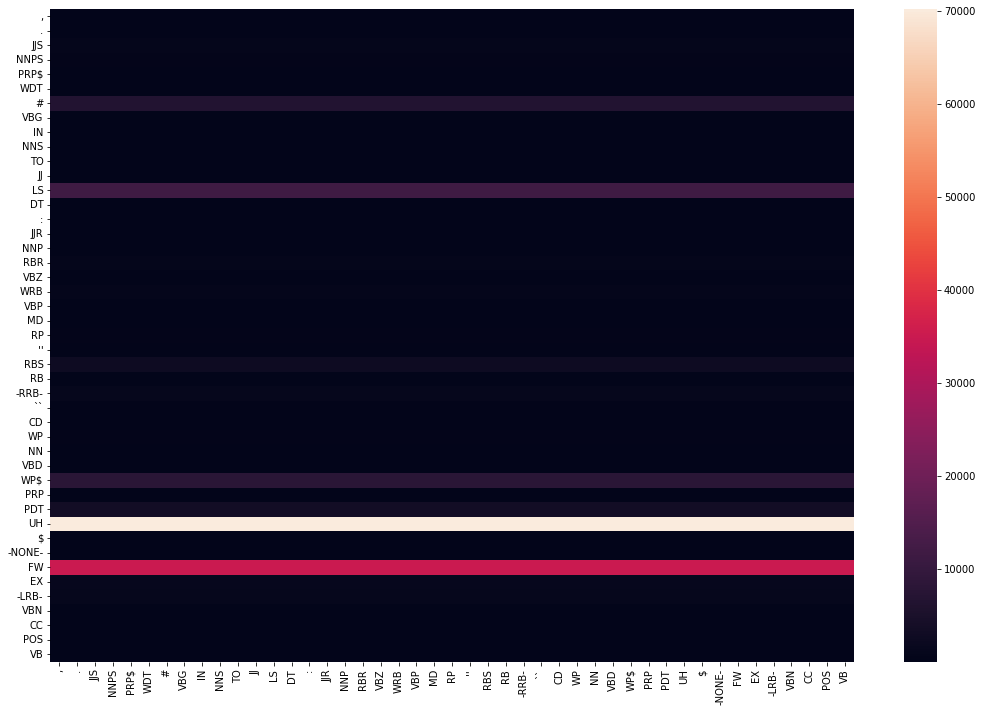

In [34]:
plt.figure(figsize=(18,12))
sns.heatmap(tags_df)
plt.show()